In [39]:
from keyframes import hello
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import numpy.linalg as lg

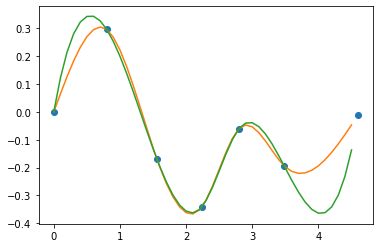

In [48]:
def interpolate_o(x, y):
    n = x.shape[0]

    X = np.zeros((4 * n - 4, 4 * n - 4))
    Y = np.zeros(4 * n - 4)

    for i in range(n - 1):
        x_s = x[i]
        x_e = x[i+1]

        # Wert Bedingung
        X[4*i, 4*i:4*(i+1)]     = np.array([1, x_s, x_s ** 2, x_s ** 3])
        X[4*i + 1, 4*i:4*(i+1)] = np.array([1, x_e, x_e ** 2, x_e ** 3])

        Y[4*i] = y[i]
        Y[4*i + 1] = y[i+1]

        if i != n - 2:
            # Steigung und Kurven Bedingung
            X[4*i + 2, 4*i:4*(i+1)] = np.array([0, 1, 2 * x_e, 3 * x_e ** 2])
            X[4*i + 3, 4*i:4*(i+1)] = np.array([0, 0, 2, 6 * x_e])

            # Steigung und Kurven Bedingung an nächsten Abschnitt
            X[4*i + 2, 4*(i+1):4*(i+2)] = np.array([0, -1, -2 * x_e, -3 * x_e ** 2])
            X[4*i + 3, 4*(i+1):4*(i+2)] = np.array([0, 0, -2, -6 * x_e])
    
    X[4*i + 2, 0:4] = np.array([0, 0, 2, 6 * x[0]])
    X[4*i + 3, -4:] = np.array([0, 0, 2, 6 * x[-1]])

    coeffs = lg.solve(X, Y)

    def fun(x_value):
        for i in range(n - 1):
            if x[i] <= x_value <= x[i+1]:
                s_i = 4 * i
                return coeffs[s_i] + coeffs[s_i + 1] * x_value + coeffs[s_i + 2] * x_value**2 + coeffs[s_i + 3] * x_value**3
    
    return fun

names, times, values = hello()

j_idx = 0
x_data = np.concatenate([[0], times[j_idx]]) # Get Time
y_data = np.concatenate([[0], list(map(lambda x: x[0], values[j_idx]))]) # Get Radiant

# x = np.arange(1, 5)
# y = np.arange(1, 5)

fun = interpolate_o(x_data, y_data)

plt.plot(x_data, y_data, "o")

ticks = np.arange(0, max(x_data), 0.1)
y_new = []
for i in ticks:
    y_new.append(fun(i))

plt.plot(ticks, y_new)

f = interpolate.interp1d(x_data, y_data, "cubic")
plt.plot(ticks, f(ticks))


In [1]:
names, times, values = hello()

# TODO Choose nearest frames

for j_idx, joint in enumerate(names):
    j_times = np.concatenate([[0], times[j_idx]]) # Get Time
    j_values = np.concatenate([[0], list(map(lambda x: x[0], values[j_idx]))]) # Get Radiant
    # j_times = times[j_idx] # Get Time
    # j_values = list(map(lambda x: x[0], values[j_idx])) # Get Radiant

    print(j_times)
    print(j_values)

    plt.plot(j_times, j_values, "o")

    tck = interpolate.splrep(j_times, j_values)

    x = np.arange(0, j_times[-1], 0.1)
    # plt.plot(j_times, j_values, "o")
    # plt.plot(x, interpolate.splev(x, tck))
    interpolate.splev(x, tck)

NameError: name 'hello' is not defined